In [32]:
import os, sys, random


sys.path.append("/home/jieying/CIS2/tf-image-segmentation/")
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

image_root = '/home/jieying/CIS2/data/foreground/'
mask_root = '/home/jieying/CIS2/data/foreground_masks/'
SPLIT = 75

from tf_image_segmentation.utils.tf_records import write_image_annotation_pairs_to_tfrecord

# Returns a list of (image, annotation) filename pairs (filename.jpg, filename.png)
image_names = os.listdir(image_root)
mask_names = os.listdir(mask_root)

overall_val_image_annotation_filename_pairs = []
overall_train_image_annotation_filename_pairs = []

for i in range(0,len(image_names)):
    flip = random.randint(1,100)
    if flip > SPLIT:
        overall_val_image_annotation_filename_pairs.append((image_root + image_names[i], mask_root + mask_names[i]))
    else:
        overall_train_image_annotation_filename_pairs.append((image_root + image_names[i], mask_root + mask_names[i]))

# You can create your own tfrecords file by providing
# your list with (image, annotation) filename pairs here
write_image_annotation_pairs_to_tfrecord(filename_pairs=overall_val_image_annotation_filename_pairs,
                                         tfrecords_filename='custom_augmented_value.tfrecords')

write_image_annotation_pairs_to_tfrecord(filename_pairs=overall_train_image_annotation_filename_pairs,
                                         tfrecords_filename='custom_augmented_train.tfrecords')

In [28]:
%matplotlib inline

import skimage.io as io

test = io.imread('/home/jieying/CIS2/data/foreground_masks/0_RGB_0000t__12136_mask.png')

In [29]:
import numpy as np

np.unique(test)

array([0, 1], dtype=uint8)

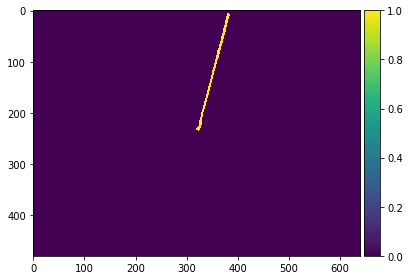

In [30]:
io.imshow(test)